In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from pathlib import Path
plt.style.use('ggplot')

### Load data

In [3]:
DATA_PATH = Path('data')

In [4]:
adata = sc.read_h5ad(DATA_PATH / "pbmc3k_raw.h5ad")

In [5]:
adata 

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

### Clean data

In [6]:
sc.pp.filter_cells(adata, min_counts=3)
sc.pp.filter_genes(adata, min_cells=10)

In [7]:
adata.var['mt'] = adata.var.index.str.startswith("MT-")

In [8]:
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=['mt'],
    percent_top=None,
    inplace=True,
    log1p=False
    )

In [9]:
adata.obs

,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
index,,,,,
AAACATACAACCAC-1,2421.0,778,2418.0,73.0,3.019024
AAACATTGAGCTAC-1,4903.0,1346,4896.0,186.0,3.799020
AAACATTGATCAGC-1,3149.0,1126,3144.0,28.0,0.890585
AAACCGTGCTTCCG-1,2639.0,953,2632.0,46.0,1.747720
AAACCGTGTATGCG-1,981.0,520,979.0,12.0,1.225741
...,...,...,...,...,...
TTTCGAACTCTCAT-1,3461.0,1148,3453.0,73.0,2.114104
TTTCTACTGAGGCA-1,3447.0,1215,3433.0,32.0,0.932129
TTTCTACTTCCTCG-1,1684.0,618,1680.0,37.0,2.202381


### Normalization and frequency

In [10]:
X = adata.X.copy().toarray()

In [11]:
X.shape

(2700, 11139)

In [12]:
x_row_normalized = X / np.expand_dims(np.sum(X,axis=1),axis=1)

In [13]:
x_row_normalized

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00020425, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [14]:
freq = np.mean(x_row_normalized, axis=0)

d:\miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

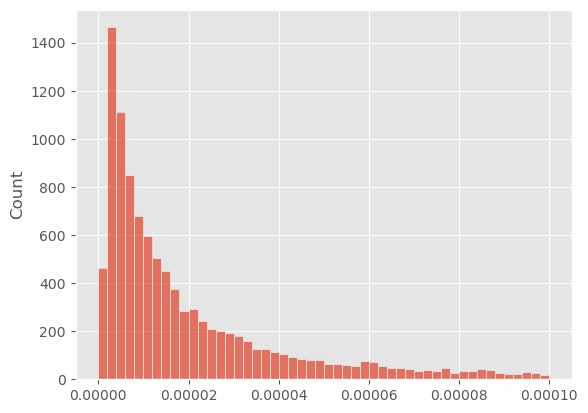

In [22]:
sns.histplot(freq, binrange=(0,1e-4))

In [16]:
freq_mean = np.mean(freq)

In [29]:
T = np.ones(shape=X.shape[1])
mat = np.where(freq > 2 * freq_mean, 1,-1)
T = T * mat

(10584,)